2024-01-30 10:49:37,020 - INFO - Cargando datos desde speech.xlsx...
2024-01-30 10:49:37,455 - INFO - Describiendo los datos...
2024-01-30 10:49:37,460 - INFO -        id_speech         year
count  58.000000    58.000000
mean   29.500000  2013.120690
std    16.886879     9.444348
min     1.000000  1990.000000
25%    15.250000  2008.250000
50%    29.500000  2016.500000
75%    43.750000  2020.000000
max    58.000000  2023.000000
2024-01-30 10:49:37,466 - INFO - Cargando datos desde sentence.xlsx...
2024-01-30 10:49:38,370 - INFO - Describiendo los datos...
2024-01-30 10:49:38,378 - INFO -        id_sentence    id_speech  sentence_number  sentence_length_raw  \
count  8773.000000  8773.000000      8773.000000          8773.000000   
mean   4387.000000    31.404537        89.120825            26.760059   
std    2532.691289    15.034992        59.400155            19.899273   
min       1.000000     1.000000         1.000000             0.000000   
25%    2194.000000    21.000000        39

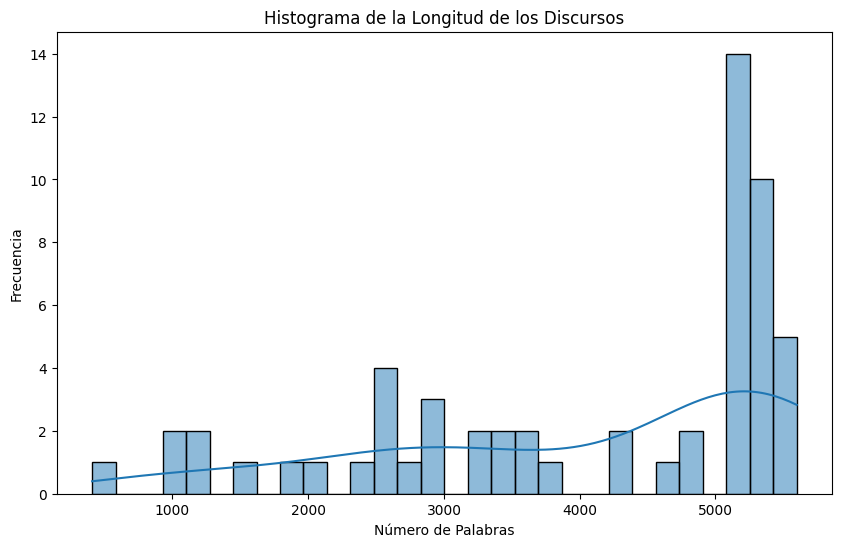

In [1]:
# notebooks/03_Pre_Analysis.ipynb
# Importaciones
import os
import sys
import logging
import pandas as pd

# Configuración del entorno del notebook
notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)

# Añadir el directorio raíz del proyecto a sys.path para importaciones
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from initialize import (
    set_global_logging,
)  # Importa la función de configuración de logging global
from config import XLSX_DIRECTORY
from utils.file_utils import read_excel_file
from utils.visualization_utils import (
    create_histogram,
    create_wordcloud,
    create_bar_chart,
    create_countplot,
    create_boxplot,
)

# Configurar logging globalmente
# set_global_logging()


# Funciones de ayuda para el EDA
def load_and_describe_data(file_name):
    logging.info(f"Cargando datos desde {file_name}...")
    df = read_excel_file(os.path.join(XLSX_DIRECTORY, file_name))
    logging.info("Describiendo los datos...")
    logging.info(df.describe())
    return df


def perform_eda(df_speeches, df_sentences):
    # Aquí se puede llamar a las funciones de visualización y análisis
    # Por ejemplo:
    logging.info("Creando visualizaciones...")
    create_histogram(
        df_speeches["text_raw"].str.split().str.len(),
        "Histograma de la Longitud de los Discursos",
        "Número de Palabras",
        "Frecuencia",
    )
    # ... y así sucesivamente con las demás visualizaciones y análisis.


def main():
    # Carga y describe los datos de los discursos
    df_speeches = load_and_describe_data("speech.xlsx")

    # Carga y describe los datos de las oraciones
    df_sentences = load_and_describe_data("sentence.xlsx")

    # Realizar el análisis exploratorio de datos
    perform_eda(df_speeches, df_sentences)


# Ejecutar el proceso principal
if __name__ == "__main__":
    main()

In [ ]:
import os
import sys
import pandas as pd
import nltk  # Importa nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


# Configuración del path
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
sys.path.append(project_root)

# Importa las variables y funciones necesarias
from config import XLSX_DIRECTORY
from utils.visualization_utils import (
    create_histogram,
    create_wordcloud,
    create_bar_chart,
    create_countplot,
    create_boxplot,
)

# Cargar los DataFrames de los archivos Excel
df_speeches = pd.read_excel(os.path.join(XLSX_DIRECTORY, "speech.xlsx"))
df_sentences = pd.read_excel(os.path.join(XLSX_DIRECTORY, "sentence.xlsx"))

# Estadísticas Descriptivas
print("Estadísticas de los discursos:")
print(df_speeches.describe())
print("\nEstadísticas de las oraciones:")
print(df_sentences.describe())

# Utilizando funciones de visualization_utils.py
# Histograma de la longitud de los discursos
create_histogram(
    df_speeches["text_raw"].apply(lambda x: len(x.split())),
    "Distribución de la Longitud de los Discursos",
    "Longitud del Discurso (palabras)",
    "Frecuencia",
)

# Histograma de la longitud de las oraciones
create_histogram(
    df_sentences["sentence_length_raw"],
    "Distribución de la Longitud de las Oraciones",
    "Longitud de la Oración (palabras)",
    "Frecuencia",
)

# Nube de palabras de los discursos
create_wordcloud(" ".join(df_speeches["text_raw"]), "Nube de Palabras de los Discursos")

# Nube de palabras de las oraciones
# Filtrar y unir solo las oraciones que no estén vacías
sentences_str = [
    str(s) for s in df_sentences["sentence_clean"] if pd.notna(s) and s != ""
]
create_wordcloud(" ".join(sentences_str), "Nube de Palabras de las Oraciones")


# Función para contar palabras no stopwords
def count_non_stopwords(text):
    words = word_tokenize(text.lower())
    non_stopwords = [
        word
        for word in words
        if word.isalpha() and word not in set(stopwords.words("spanish"))
    ]
    return Counter(non_stopwords)


# Contar palabras en todos los discursos
word_counts = Counter()
df_speeches["text_raw"].apply(
    lambda text: word_counts.update(count_non_stopwords(text))
)

# Las 10 palabras más comunes
most_common_words = word_counts.most_common(10)
print("Las 10 palabras más comunes:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Gráfico de barras para las 10 palabras más comunes
create_bar_chart(
    dict(most_common_words), "Top 10 Palabras más Frecuentes", "Palabras", "Frecuencia"
)

# Distribución de discursos por año
create_countplot(
    df_speeches,
    "year",
    "Distribución de Discursos por Año",
    df_speeches["year"].value_counts().index,
)

# Distribución de discursos por presidente
create_countplot(
    df_speeches,
    "president",
    "Distribución de Discursos por Presidente",
    df_speeches["president"].value_counts().index,
)

# Distribución de discursos por país
create_countplot(
    df_speeches,
    "country",
    "Distribución de Discursos por País",
    df_speeches["country"].value_counts().index,
)

# Relación entre la longitud de los discursos y el año
create_boxplot(
    df_speeches,
    "year",
    df_speeches["text_raw"].apply(lambda x: len(x.split())),
    "Relación entre la Longitud de los Discursos y el Año",
)

# Relación entre la longitud de los discursos y el presidente
create_boxplot(
    df_speeches,
    "president",
    df_speeches["text_raw"].apply(lambda x: len(x.split())),
    "Relación entre la Longitud de los Discursos y el Presidente",
)